# ANALYSE DES DONNÉES :

## Préalables :

In [1]:
# Importation des librairies :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm

In [2]:
# Importations des fichiers :
customers = pd.read_csv("customers2.csv")
products = pd.read_csv("products2.csv")
transactions = pd.read_csv("transactions2.csv")

## I - Mesures de tendance centrale :

### A - Analyse des produits :

#### 1 - Prix min et prix max :

In [3]:
# Prix le plus bas parmi les produits vendus :
products.price.min()

0.62

In [4]:
# Prix le plus haut parmi les produits vendus :
products.price.max()

300.0

#### 2) Calcul du prix moyen :

In [5]:
# Prix moyen des produits vendus :
prixMoyen = products.price.mean()
prixMoyen

21.863597078514857

#### 3) Calcul du prix médian :

In [6]:
# Prix médian des produits vendus :
prixMedian = products.price.median()
prixMedian

13.075

#### 4) Calcul du mode :

In [7]:
# Prix le plus fréquent parmi les produits vendus :
prixMode = products.price.mode()
prixMode

0    4.99
dtype: float64

#### 5 - Par catégorie :

In [8]:
# Nombre de références par catégories
products[["price","categ"]].groupby(by="categ").count()

,price
categ,
0,2308
1,739
2,239


In [9]:
# Moyenne de prix par catégorie :
products[["price","categ"]].groupby(by="categ").mean()

,price
categ,
0,11.732795
1,25.531421
2,108.354686


In [10]:
# Prix médians par catégorie :
products[["price","categ"]].groupby(by="categ").median()

,price
categ,
0,10.32
1,22.99
2,101.99


In [11]:
# Prix les plus bas par catégorie :
products[["price","categ"]].groupby(by="categ").min()

,price
categ,
0,0.62
1,2.00
2,30.99


In [12]:
# Prix les plus haut par catégorie :
products[["price","categ"]].groupby(by="categ").max()

,price
categ,
0,40.99
1,80.99
2,300.00


#### 6 - Visualisation "Prix des produits" :

Text(0.5, 6.79999999999999, 'Prix')

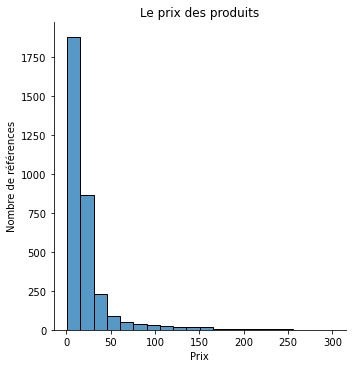

In [13]:
# Le prix des produits
sns.displot(products["price"], bins=20)
plt.title("Le prix des produits")
plt.ylabel("Nombre de références")
plt.xlabel("Prix")

#### 7 - Conclusion

In [14]:
# L'entreprise "Rester livres" découpe ses produits en trois catégories qui correspondent à des gammes.
# - La catégorie A correspond à de l'entrée de gamme (livres de poche ? accessoires ?). Elle a logiquement le plus grand nombre de références.
# - La catégorie B correspond au moyen de gamme (livres brochés ?).
# - La catégorie C correspond à du haut de gamme (collection ?). Il y a peu de référence et les prix peuvent être très au-dessus de ceux des autres catégories.

### B - Analyse des paniers :

#### 1 - Groupement des achats en panier :

In [15]:
# Jointure :
transactProducts = pd.merge(transactions, products)
transactProducts.head()

,id_prod,date,session_id,client_id,price,categ
0,0_1483,2021-04-10,s_18746,c_4450,4.99,0
1,0_1483,2021-10-18,s_106741,c_1576,4.99,0
2,0_1483,2021-11-14,s_119491,c_182,4.99,0
3,0_1483,2021-07-30,s_69222,c_1196,4.99,0
4,0_1483,2021-03-30,s_13545,c_2890,4.99,0


In [16]:
# Groupement :
panier = transactProducts[["price","session_id"]].groupby(by="session_id").sum()
panier.head()

,price
session_id,
s_1,11.99
s_10,26.99
s_100,33.72
s_1000,39.22
s_10000,41.49


#### 2 - Calcul du panier moyen :

In [17]:
# Panier moyen :
panierMoyen = panier.mean()
panierMoyen

price    34.264202
dtype: float64

#### 3 - Calcul du panier médian :

In [18]:
# Panier médian :
panierMedian = panier.median()
panierMedian

price    25.56
dtype: float64

#### 4 - Panier min et max :

In [19]:
# Plus petit panier enregistré :
panier.price.min()

0.62

In [20]:
# Plus gros panier enregistré
panier.price.max()

539.23

#### 5 - Nombre moyen d'articles par panier :

In [21]:
# Nombre moyen d'articles par panier :
panierNbr = transactProducts[["price","session_id"]].groupby(by="session_id").count()
panierNbr.mean()

price    1.990347
dtype: float64

### C - Analyse de la clientèle :

#### 1) Ajout d'une colonne "age" :

In [22]:
# Calcul d'une colonne age à partir de la colonne "birth" :
customers["age"] = 2021 - customers["birth"]
customers.head()

,client_id,sex,birth,age
0,c_4410,f,1967,54
1,c_7839,f,1975,46
2,c_1699,f,1984,37
3,c_5961,f,1962,59
4,c_5320,m,1943,78


#### 2) Tendance centrale - sexe

In [23]:
# Calcul du nombre total de clients enregistrés :
clientsT = customers.sex.count()
clientsT

8621

In [24]:
# Calcul du nombre total de clients :
clientsH = customers[customers["sex"]=="m"]["sex"].count()
clientsH

4131

In [25]:
# Calcul du nombre total de clientes :
clientsF = customers[customers["sex"]=="f"]["sex"].count()
clientsF

4490

In [26]:
# Calcul de la proportion de clients :
partClientsH = clientsH/clientsT*100
partClientsH

47.917874956501564

In [27]:
# Calcul de la proportion de clientes :
partClientsF = clientsF/clientsT*100
partClientsF

52.082125043498436

#### 3 - Tendance centrale - âge

In [28]:
# Plus jeune âge parmi les clients :
customers["age"].min()

17

In [29]:
# Plus grand âge parmi les clients :
customers["age"].max()

92

In [30]:
# Âge moyen :
customers["age"].mean()

42.724393921818816

In [31]:
# Âge médian :
customers["age"].median()

42.0

In [32]:
# Âge le plus représenté
customers["age"].mode()

0    17
dtype: int64

In [33]:
# Groupement des achat par clients et jointure pour indiquer leur âge :
clients = transactProducts[["price","client_id"]].groupby(by="client_id").sum()
clients2 = pd.merge(customers, clients, on=["client_id"])
clients2.sort_values(by="price").head()

,client_id,sex,birth,age,price
2717,c_8140,m,1971,50,4.15
2462,c_8114,m,1962,59,4.99
3165,c_1675,f,2000,21,5.57
1146,c_890,f,2002,19,6.08
2169,c_8351,f,1968,53,6.31


In [34]:
# Montant moyen dépensé par un client dans l'année :
clients2["price"].mean()

674.0206709302314

In [35]:
# Montant median dépensé par un client dans l'année :
clients2["price"].median()

501.31000000000006

#### 4 - Âge moyen par sexe :

In [36]:
# Âge moyen des clientes :
clients2[clients2["sex"]=="f"]["age"].mean()

43.027238222817594

In [37]:
# Âge moyen des clients :
clients2[clients2["sex"]=="m"]["age"].mean()

42.426352826983745

#### 5 - Importance du sexe dans le chiffre d'affaires :

In [38]:
# Part des clients dans le chiffre d'affaires :
clients2[clients2["sex"]=="m"]["price"].sum()/clients2["price"].sum()*100

50.67569377232735

In [39]:
# Part des clientes dans le chiffre d'affaires :
clients2[clients2["sex"]=="f"]["price"].sum()/clients2["price"].sum()*100

49.32430622767266

### D - Analyse du chiffre d'affaires :

#### 1 - Réalisation d'un tableau "chiffre d'affaires"

In [40]:
# Jointure entre le fichier "transaction" et le fichier "products" :
chiffreAffaires = pd.merge(transactions, products, on="id_prod")
chiffreAffaires.head()

,id_prod,date,session_id,client_id,price,categ
0,0_1483,2021-04-10,s_18746,c_4450,4.99,0
1,0_1483,2021-10-18,s_106741,c_1576,4.99,0
2,0_1483,2021-11-14,s_119491,c_182,4.99,0
3,0_1483,2021-07-30,s_69222,c_1196,4.99,0
4,0_1483,2021-03-30,s_13545,c_2890,4.99,0


#### 2 - Calcul du chiffres d'affaires 

In [41]:
# Calcul du chiffre d'affaires :
chiffreAffaires["price"].sum()

5796577.7700000005

Text(0.5, 1.0, "Part des catégories de produits dans le chiffre d'affaires")

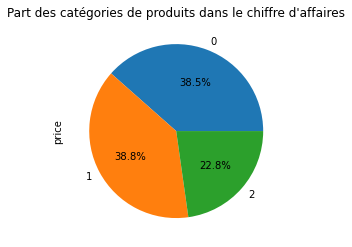

In [42]:
# Part des catégories de produits dans le chiffre d'affaires :
catCA = chiffreAffaires.groupby("categ")["price"].sum()
catCA.plot.pie(autopct="%.1f%%")
plt.title("Part des catégories de produits dans le chiffre d'affaires")

#### 3 - Évolution des ventes

Text(0, 0.5, 'Montant')

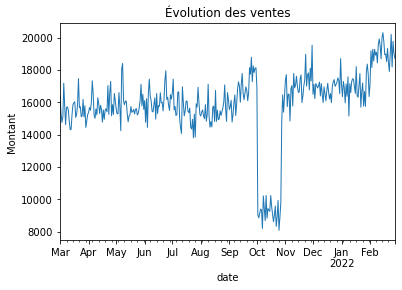

In [43]:
# Évolution des ventes (graphique) :
chiffreAffaires["date"]=pd.to_datetime(chiffreAffaires["date"])
chiffreAffaires["date"].dt.strftime('%Y-%m')
dateCA = chiffreAffaires.groupby("date")["price"].sum()
dateCA.plot(linewidth=1)
plt.title("Évolution des ventes")
plt.ylabel("Montant")

In [44]:
# fig, axes = plt.subplots(2, 3, figsize=(18, 10))

Text(0, 0.5, "Nombre d'articles")

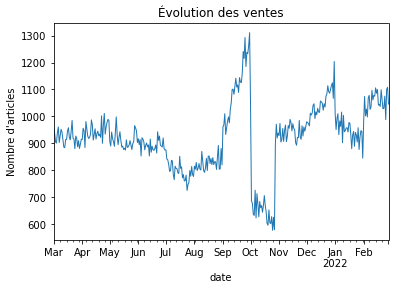

In [45]:
# Évolution des ventes (en nombre d'articles)
dateCA3 = chiffreAffaires.groupby("date")["client_id"].count()
dateCA3.plot(linewidth=1)
plt.title("Évolution des ventes")
plt.ylabel("Nombre d'articles")

Text(0, 0.5, 'Nombre de clients différents')

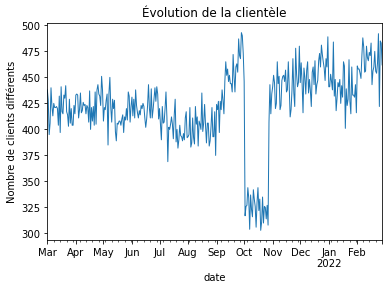

In [46]:
# Évolution des ventes (en nombre de clients)
dateCA3 = chiffreAffaires.groupby("date")["client_id"].nunique()
dateCA3.plot(linewidth=1)
plt.title("Évolution de la clientèle")
plt.ylabel("Nombre de clients différents")

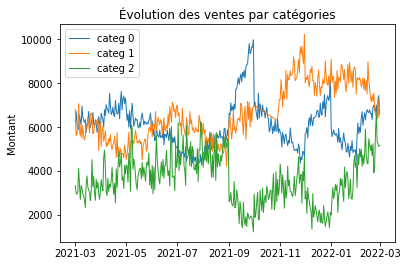

In [47]:
# Évolution du chiffre d'affaires par catégorie
dateCA0 = chiffreAffaires[chiffreAffaires["categ"]==0]
dateCA0 = dateCA0.groupby("date")["price"].sum()

dateCA1 = chiffreAffaires[chiffreAffaires["categ"]==1]
dateCA1 = dateCA1.groupby("date")["price"].sum()

dateCA2 = chiffreAffaires[chiffreAffaires["categ"]==2]
dateCA2 = dateCA2.groupby("date")["price"].sum()

plt.plot(dateCA0, linewidth=1, label="categ 0")
plt.plot(dateCA1, linewidth=1, label="categ 1")
plt.plot(dateCA2, linewidth=1, label="categ 2")
plt.title("Évolution des ventes par catégories")
plt.ylabel("Montant")
plt.legend()

# On remarque un artefact sur la courbe des produits de catégorie 1 au cours du mois d'octobre.

Text(0, 0.5, 'Montant')

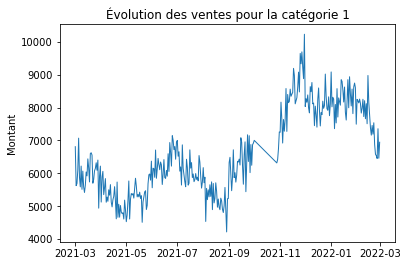

In [48]:
# Évolution des ventes pour la catégorie 1 :
plt.plot(dateCA1, linewidth=1, label="categ 1")
plt.title("Évolution des ventes pour la catégorie 1")
plt.ylabel("Montant")

In [49]:
# Focus sur les ventes du mois d'octobre 2021 pour la catégorie 1 :
dateCA1["2021-10"]

date
2021-10-01    7003.79
2021-10-28    6317.99
2021-10-29    6425.18
2021-10-30    6753.69
2021-10-31    7261.67
Name: price, dtype: float64

In [50]:
# Il n'y a eu aucune vente de produits de catégorie 1 entre les 1er et 28 octobre.
# Ce mois sans vente d'une catégorie importante est certainement la raison de la chute du chiffres d'affaires.
# On peut émettre l'hypothèse d'une pénurie ou d'un problème de livraison.

## II - Mesures de dispersion :¶

#### 1 - Dispertion des âges des clients :

Text(0.5, 0, 'âge')

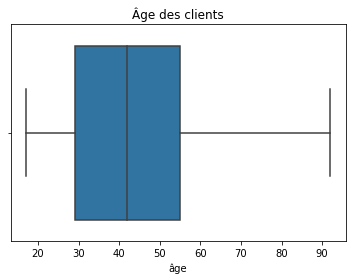

In [51]:
# Âge des clients (boîte à moustaches)
sns.boxplot(x=customers["age"])
plt.title("Âge des clients")
plt.xlabel("âge")

In [52]:
# Variance empirique :
np.var(customers["age"],ddof=0)

286.1841039274172

In [53]:
# Écart-type empirique :
np.std(customers["age"],ddof=0)

16.916976796325553

#### 2 - Dispersion des prix des produits :

Text(0.5, 0, 'Prix')

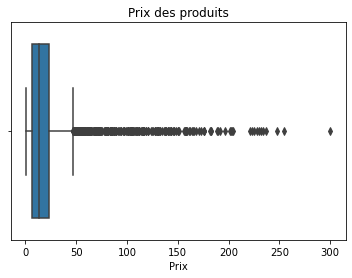

In [54]:
# Prix des produits (boîte à moustaches)
sns.boxplot(x=products["price"],orient="h")
plt.title("Prix des produits")
plt.xlabel("Prix")

In [55]:
# Variance empirique :
np.var(products["price"],ddof=0)

890.7385487165337

In [56]:
# Écart-type empirique :
np.std(products["price"],ddof=0)

29.845243318099012

## III - Mesures de forme :¶

#### 1 - Répartition des âges des clients

Text(3.674999999999997, 0.5, 'Nombre de clients')

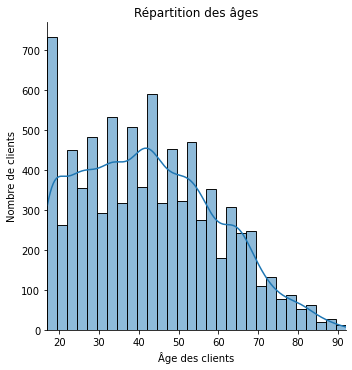

In [57]:
# Répartition des âges des clients (histogramme + courbe moyenne)
sns.displot(customers["age"], kde=True)
plt.xlim(17,92)
plt.title("Répartition des âges")
plt.xlabel("Âge des clients")
plt.ylabel("Nombre de clients")

In [58]:
# Mesure de forme (Skewness) :
customers["age"].skew()

0.360813881775354

In [59]:
# Mesure de forme (Kurtosis) :
customers["age"].kurtosis()

-0.636664753633164

#### 2 - Répartition des paniers :

Text(-9.075000000000003, 0.5, 'Nombre total de paniers')

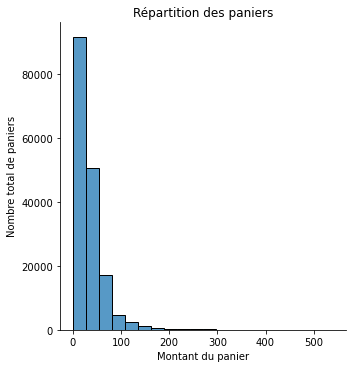

In [60]:
# Répartion des paniers (histogramme) :
sns.displot(panier["price"], bins=20)
plt.title("Répartition des paniers")
plt.xlabel("Montant du panier")
plt.ylabel("Nombre total de paniers")

In [61]:
# Mesure de forme (Skewness) :
panier["price"].skew()

3.3485975856657486

In [62]:
# Mesure de forme (Kurtosis) :
panier["price"].kurtosis()

18.839821204709057

## IV - Mesures de concentration :

#### 1) Concentration des clients ?

In [63]:
# Définition du calcul de l'indice de Gini :
def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

In [64]:
# Définition du tracé d'une courbe de Lorenz :
def lorenz(arr):
    arr_lorenz = arr.cumsum() / arr.sum()
    arr_lorenz[0], arr_lorenz[-1]
    fig, ax = plt.subplots(figsize=[6,6])
    ax.scatter(np.arange(arr_lorenz.size)/(arr_lorenz.size-1), arr_lorenz, marker='x', color='orange', s=3)
    ax.plot([0,1], [0,1], color='k')

None


Text(0, 0.5, 'Part cumulée des dépenses')

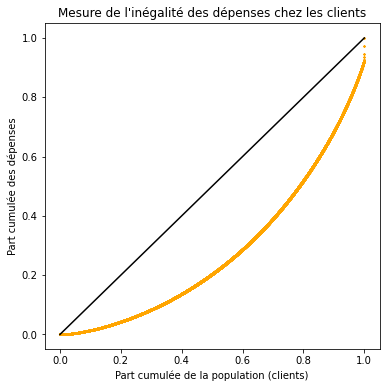

In [65]:
# La concentration des dépenses chez les clients :
arr = clients["price"]
arr = arr.sort_values()
print(lorenz(arr))
plt.title("Mesure de l'inégalité des dépenses chez les clients")
plt.xlabel("Part cumulée de la population (clients)")
plt.ylabel("Part cumulée des dépenses")

In [66]:
# Calcul de la concentration des dépenses chez les clients (indice de Gini) :
print(gini(arr))

0.4397099070275079


#### 2) concentration des paniers :

None


Text(0, 0.5, 'Part cumulée des montants')

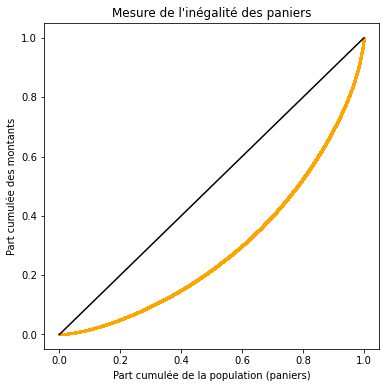

In [67]:
arr = panier["price"]
arr = arr.sort_values()

print(lorenz(arr))
plt.title("Mesure de l'inégalité des paniers")
plt.xlabel("Part cumulée de la population (paniers)")
plt.ylabel("Part cumulée des montants")

In [68]:
# Calcul de la concentration des paniers (indice de Gini) :
print(gini(arr))

0.4204676352902932


## V - Analyses bivariées :

#### 1 - Catégories de produits et prix :

Text(0, 0.5, 'Catégorie')

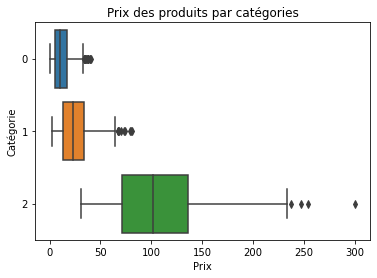

In [69]:
# Prix des produits par catégories (boîte à moustaches)
sns.boxplot(x=products["price"], y=products["categ"], orient="h")
plt.title("Prix des produits par catégories")
plt.xlabel("Prix")
plt.ylabel("Catégorie")

#### 2 - Âge et dépenses :

Text(0, 0.5, 'Montant total dépensé')

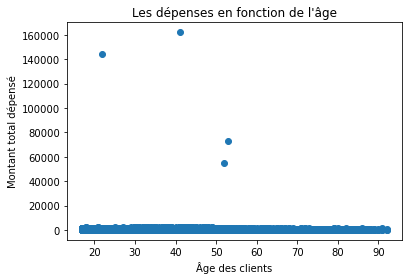

In [70]:
# Les dépenses en fonction de l'âge (nuage de points)
plt.plot(clients2["age"], clients2["price"], "o")
plt.title("Les dépenses en fonction de l'âge")
plt.xlabel("Âge des clients")
plt.ylabel("Montant total dépensé")

In [71]:
# REMARQUE : quatre outliers importants perturbent la lecture du graphique.

Text(0, 0.5, 'Montant total dépensé')

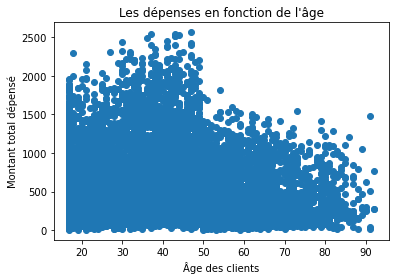

In [72]:
# Les dépenses en fonction de l'âge (nuage de points) - après suppression des outliers :
outliers = ["c_1609","c_4958","c_6714","c_3454"]
clients3 = clients2.drop(clients2[clients2["client_id"].isin(outliers)].index)
plt.plot(clients3["age"], clients3["price"], "o")
plt.title("Les dépenses en fonction de l'âge")
plt.xlabel("Âge des clients")
plt.ylabel("Montant total dépensé")

#### 3 - Sexe et dépenses :

Text(0, 0.5, 'Sexe de clients')

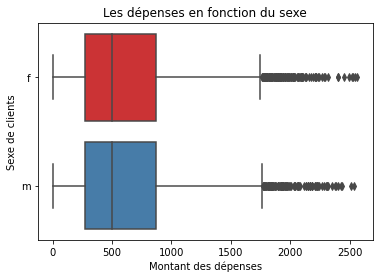

In [73]:
# Les dépenses en fonction du sexe (boîte à moustaches)
sns.boxplot(x=clients3["price"], y=clients3["sex"], palette="Set1")
plt.title("Les dépenses en fonction du sexe")
plt.xlabel("Montant des dépenses")
plt.ylabel("Sexe de clients")

#### 4 - Sexe et âge :

Text(0, 0.5, 'Sexe de clients')

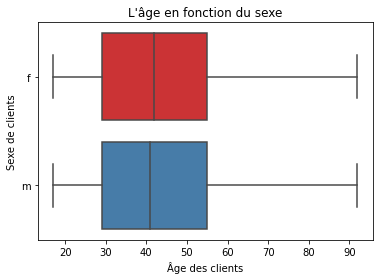

In [74]:
# Les dépenses en fonction de l'âge (boîte à moustaches)
sns.boxplot(x=customers["age"], y=customers["sex"], palette="Set1")
plt.title("L'âge en fonction du sexe")
plt.xlabel("Âge des clients")
plt.ylabel("Sexe de clients")

#### 5 - Sexe des clients et catégorie de produit

In [75]:
# Jointure :
customersProducts = pd.merge(transactProducts, customers, on ="client_id")
customersProducts.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1483,2021-04-10,s_18746,c_4450,4.99,0,f,1977,44
1,0_1085,2021-09-29,s_97382,c_4450,3.99,0,f,1977,44
2,0_1453,2021-08-27,s_81509,c_4450,7.99,0,f,1977,44
3,0_1405,2021-08-27,s_81509,c_4450,4.99,0,f,1977,44
4,0_1392,2021-12-28,s_141302,c_4450,6.30,0,f,1977,44


In [76]:
# Tableau pivot sexe/catégories de produits :
cpSexCateg = customersProducts.pivot_table(index ="sex",columns="categ", values="price", aggfunc=len)
cpSexCateg.head()

categ,0,1,2
sex,,,
f,103786.0,55469.0,8260.0
m,105640.0,54266.0,9292.0


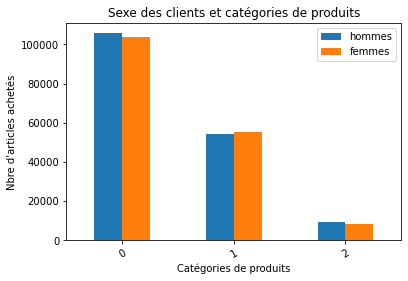

In [77]:
# Sexe des clients et catégories de produits :
yf = [103786, 55469, 8260]
ym = [105640, 54266, 9292]
mydata = pd.DataFrame({"hommes":ym,"femmes":yf})
mydata.index = ["0","1","2"]
from pandas import plotting
mydata.plot(kind="bar",rot=30)
plt.title("Sexe des clients et catégories de produits")
plt.xlabel("Catégories de produits")
plt.ylabel("Nbre d'articles achetés")
plt.show()

#### 6 - Âge des clients et catégories de produits :

In [78]:
# Réalisation d'un tableau pivot Âge/Catégorie :
cpAgeCateg = customersProducts.pivot_table(index ="age",columns="categ", values="price", aggfunc=len)
cpAgeCateg.head()

categ,0,1,2
age,,,
17,1668.0,2759.0,2921.0
18,488.0,817.0,877.0
19,497.0,830.0,896.0
20,461.0,732.0,839.0
21,586.0,791.0,797.0


In [79]:
# Calcul de l'âge moyen des clients par catégories :
customersProducts.groupby("categ")["age"].mean()

categ
0    42.897720
1    46.659124
2    24.728179
Name: age, dtype: float64

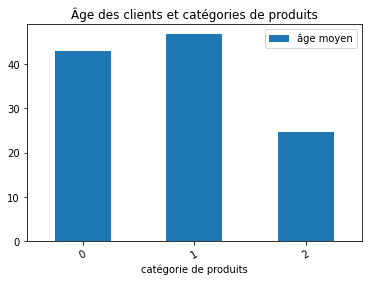

In [80]:
# Âge des clients et catégories de produits (bar) :
am = [42.897720, 46.659124, 24.728179]
ageMoyenCateg = pd.DataFrame({"âge moyen":am})
ageMoyenCateg.index = ["0","1","2"]
from pandas import plotting
ageMoyenCateg.plot(kind="bar",rot=30)
plt.title("Âge des clients et catégories de produits")
plt.xlabel("catégorie de produits")
plt.show()

## VI - Corrélations

### A - Correlation entre sexe des clients et catégories de produits :

In [81]:
# Réalisation d'un tableau pivot Sexe/Catégorie :
correlSexCat = customersProducts.pivot_table(index="sex", columns="categ", values="price" , aggfunc=len, margins=True, margins_name="Total")
correlSexCat

categ,0,1,2,Total
sex,,,,
f,103786.0,55469.0,8260.0,167515.0
m,105640.0,54266.0,9292.0,169198.0
Total,209426.0,109735.0,17552.0,336713.0


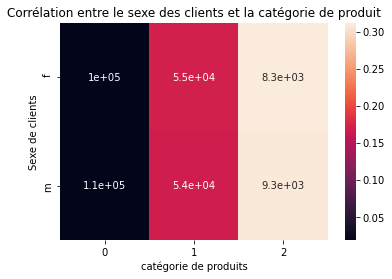

In [82]:
# Tableau de contingence Sexe/Catégories (heatmap) :
tx = correlSexCat.loc[:,["Total"]]
ty = correlSexCat.loc[["Total"],:]
n = len(customersProducts)
indep = tx.dot(ty) / n

c = correlSexCat.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title("Corrélation entre le sexe des clients et la catégorie de produit")
plt.xlabel("catégorie de produits")
plt.ylabel("Sexe de clients")
plt.show()

### B - Correlation entre l'âge des clients et...

#### 1 - le montant total des achats :

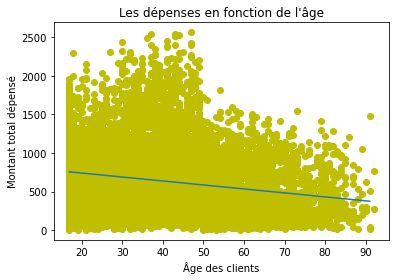

In [83]:
#  Régression linéaire : les dépenses en fonction de l'âge :
Y = clients3['price']
X = clients3[['age']]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']
plt.plot(clients3.age,clients3.price, "oy")
plt.plot(np.arange(17,92),[a*x+b for x in np.arange(17,92)])
plt.title("Les dépenses en fonction de l'âge")
plt.xlabel("Âge des clients")
plt.ylabel("Montant total dépensé")
plt.show()

In [84]:
# coefficient de corrélation :
st.pearsonr(clients3["age"],clients3["price"])[0]

-0.19042316059607656

#### 2 - La fréquence d'achat :

In [85]:
# Tableau de fréquence d'achat :
ageCustomers = customers[["client_id","age"]]
panier2 = transactProducts[["client_id","price"]].groupby(by="client_id").count()
panier2 = panier2.rename(columns={"price":"nombre total de paniers"})
panier2["frequence_achat"]=panier2["nombre total de paniers"]/12
panier2 = pd.merge(panier2, ageCustomers, on="client_id").sort_values(by="age")
outliers = ["c_1609","c_4958","c_6714","c_3454"]
panier2 = panier2.drop(panier2[panier2["client_id"].isin(outliers)].index)
panier2.head()

,client_id,nombre total de paniers,frequence_achat,age
5265,c_5749,8,0.666667,17
8245,c_8437,7,0.583333,17
1212,c_2090,30,2.500000,17
4501,c_5059,7,0.583333,17
316,c_1284,16,1.333333,17


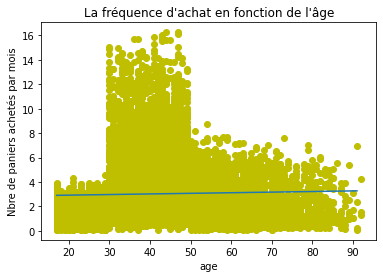

In [86]:
# La fréquence d'achat en fonction de l'âge (nuage de points et regression linéaire) :
Y = panier2["frequence_achat"]
X = panier2[["age"]]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a,b = result.params["age"],result.params['intercept']
plt.plot(panier2.age,panier2.frequence_achat, "oy")
plt.plot(np.arange(17,92),[a*x+b for x in np.arange(17,92)])
plt.title("La fréquence d'achat en fonction de l'âge")
plt.xlabel("age")
plt.ylabel("Nbre de paniers achetés par mois")
plt.show()

In [87]:
# coefficient de corrélation :
st.pearsonr(panier2["age"],panier2["frequence_achat"])[0]
# Mais relation manifestement non-linéraire et non-monotone.

0.030041938684803038

In [88]:
# coefficient de corrélation robuste :
st.spearmanr(panier2["age"],panier2["frequence_achat"])[0]

0.13184848080133205

In [89]:
# La valeur du coefficient de Spearman est supérieure à celle du coefficient de Pearson.
# Ceci indique l'existence d'une relation non-linéaire visible sur le graphique précédent.

#### 3 - La taille du panier moyen :

In [90]:
# Tableau nombre d'articles par panier :
articlesParPanier = transactProducts[["price","session_id"]].groupby(by="session_id").count()
articlesParPanier = articlesParPanier.rename(columns= {"price":"nbr_articles"})
articlesParPanier.head()

,nbr_articles
session_id,
s_1,1
s_10,1
s_100,2
s_1000,4
s_10000,3


In [91]:
# Tableau SessionClient :
sessionClient = transactProducts[["session_id","client_id"]]
sessionClient = pd.merge(sessionClient, ageCustomers, on="client_id")
sessionClient.drop_duplicates(keep="first", inplace=True)
sessionClient.sort_values(by="session_id").head()

,session_id,client_id,age
272025,s_1,c_329,54
212183,s_10,c_2218,51
24479,s_100,c_3854,43
275490,s_1000,c_1014,32
273511,s_10000,c_476,32


In [92]:
# Jointure des tableaux "sessionClient" et "articlesParPanier" :
testAgePanier = pd.merge(sessionClient,articlesParPanier,on="session_id").drop_duplicates(keep="first")
testAgePanier.sort_values(by="session_id").head()

,session_id,client_id,age,nbr_articles
133029,s_1,c_329,54,1
100305,s_10,c_2218,51,1
10011,s_100,c_3854,43,2
135153,s_1000,c_1014,32,4
133973,s_10000,c_476,32,3


Text(0, 0.5, "Nbre d'articles moyen dans le panier")

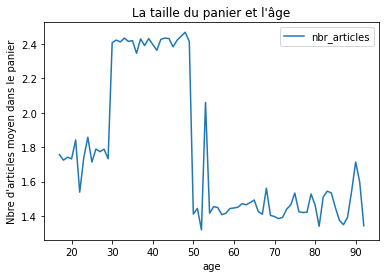

In [93]:
# Nombre d'articles par panier selon l'âge (graphique) :
testAgePanier2 = testAgePanier[["age","nbr_articles"]].groupby(by="age").mean()
testAgePanier2.plot()
plt.title("La taille du panier et l'âge")
plt.xlabel("age")
plt.ylabel("Nbre d'articles moyen dans le panier")

In [94]:
# coefficient de corrélation :
st.pearsonr(testAgePanier["age"],testAgePanier["nbr_articles"])

(-0.1776109591109809, 0.0)

In [95]:
# coefficient de corrélation robuste :
st.spearmanr(testAgePanier["age"],testAgePanier["nbr_articles"])

SpearmanrResult(correlation=-0.22700488996113508, pvalue=0.0)

In [96]:
# La valeur du coefficient de Spearman est supérieure à celle du coefficient de Pearson.
# Ceci indique l'existence d'une relation non-linéaire visible sur le graphique précédent.

#### 4 - Les catégories de produits achetés :

In [97]:
# Définition de la méthode ANOVA :

X = "categ" # qualitative
Y = "montant" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

Text(0, 0.5, 'catégorie de produits')

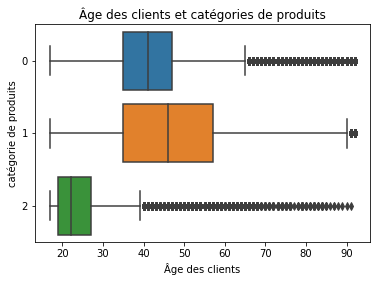

In [98]:
# Âge des clients et catégories de produits (boxplot) :
sns.boxplot(data=customersProducts,x="age",y="categ", orient="h")
plt.title("Âge des clients et catégories de produits")
plt.xlabel("Âge des clients")
plt.ylabel("catégorie de produits")

In [99]:
# Coefficient de corrélation :
eta_squared(customersProducts["categ"],customersProducts["age"])

0.11886832303677641